In [4]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# IO

In [336]:
db = CaseDB()

toload = [
    dict(name="puff", id="c7a-c4e_aa_fix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = False, keep_yboundaries = True),
    # dict(name="puffg", id="c7a-c4e_aa_fix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = False, keep_yboundaries = True),
    dict(name="compasslike", id="x-c6-compasslike", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
    dict(name="st40_process", id="x-c8-st40_process", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
    dict(name="no_neutrals", id="x-c8b-no_neutrals", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
    dict(name="noneut_src", id="x-c9-noneut_coresrc", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
    dict(name="puff_tn", id="c8a-c7a_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
#     # dict(name="src_tn", id="d3a-d2b_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True, keep_yboundaries = False),
#     # dict(name="src", id="d2a-d1a_aa_fix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = False , keep_yboundaries = False),
    dict(name="src_pfix", id="d4a-d2b_fix_psrc", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True, keep_yboundaries = True),
#     dict(name="testbase", id="x-c2b-rtol1e-7", grid="g3b1f1-puff_1.2e21_3eV.nc", unnormalise_geom = True, keep_yboundaries = False),
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"],
                                           keep_yboundaries = case["keep_yboundaries"])
    
# casepath = r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\06"
# gridpath = r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-68x96-cellcorners.grd.nc"

# casestore["compass"] = Load.case_2D(
#     casepath, 
#     gridpath,
#     double_load = False, keep_xboundaries = True)

# casestore["compassg"] = Load.case_2D(
#     casepath, 
#     gridpath,
#     double_load = False, keep_xboundaries = True, keep_yboundaries = True)

--> g11, g_22, dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]
No recycling partner found for d+
CHECK: Total domain volume is 1.607E+00 [m3]
No recycling partner found for d+
CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]


In [324]:
%matplotlib inline

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Domain volume: 1.942e+00 [m3]
Particle imbalance: -1.111e+19 [s-1]
Particle imbalance as frac of core + source: -0.69%
---------------------------------------
Total fluxes in [s-1]:


,d+,d,total
source,0.00e+00,1.20e+21,1.20e+21
core,4.18e+20,0.00e+00,4.18e+20
sol,0.00e+00,0.00e+00,0.00e+00
pfr,0.00e+00,0.00e+00,0.00e+00
targets,-3.26e+22,3.10e+22,-1.63e+21
iz,3.21e+22,-3.21e+22,0.00e+00
rec,-1.69e+18,1.69e+18,0.00e+00


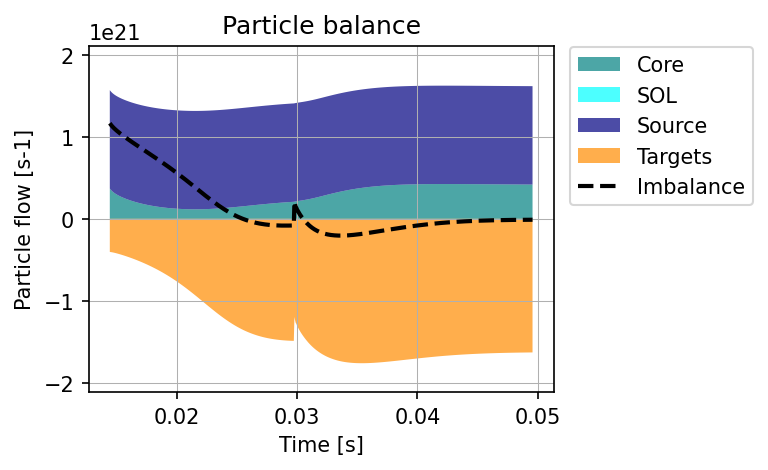

In [337]:
name = "puff"
ds = casestore[name].ds
ds = calculate_radial_fluxes(ds, force_neumann = True)
ds = calculate_target_fluxes(ds)
ds = calculate_heat_balance(ds)
ds = calculate_particle_balance(ds)

show_particle_balance_table(ds)
plot_particle_balance(ds)

---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Domain volume: 1.942e+00 [m3]
Power imbalance: 0.025 [MW]
Power imbalance as frac of core + source: 1.62%
---------------------------------------
Total fluxes in [MW]:


,d,e,d+,total
source,0.00,0.00,0.00,0.00
core,0.00,0.81,0.75,1.56
sol,0.00,0.00,-0.00,-0.00
pfr,0.00,0.00,0.00,0.00
targets,0.00,-0.51,-0.90,-1.41
rad_ex,nan,-0.13,nan,-0.13
rad_rec,nan,-0.00,nan,-0.00


<class 'list'>
<class 'list'>


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


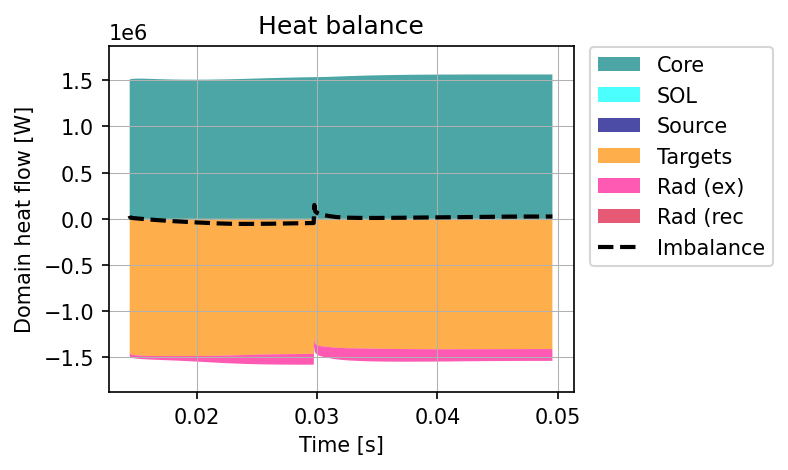

In [338]:
show_heat_balance_table(ds)
plot_heat_balance(ds)

In [13]:
df = pd.DataFrame()
m = ds.metadata
d = ds.isel(t=-1)
for name in m["targets"]:
    df.loc[name, "pf_d+"] = d[f"pf_{name}_d+"].sum()
    df.loc[name, "hf_d+"] = d[f"hf_{name}_d+"].sum()
    df.loc[name, "hf_e"] = d[f"hf_{name}_e"].sum()
    
df

,pf_d+,hf_d+,hf_e
inner_lower,-2.906978e+21,-103232.820517,-56852.785014
outer_lower,-1.384618e+22,-357468.211531,-202304.845088
inner_upper,-2.918416e+21,-103634.588149,-57027.667639
outer_upper,-1.726289e+22,-447981.842377,-244213.078280


### Find neutral source in the final target cell for sanity check

In [35]:
d = ds.isel(x=slice(2,-2)).isel(t=-1)


(d["Sd+_rec"] * d["dv"]).sum().values

array(-1.68537937e+18)

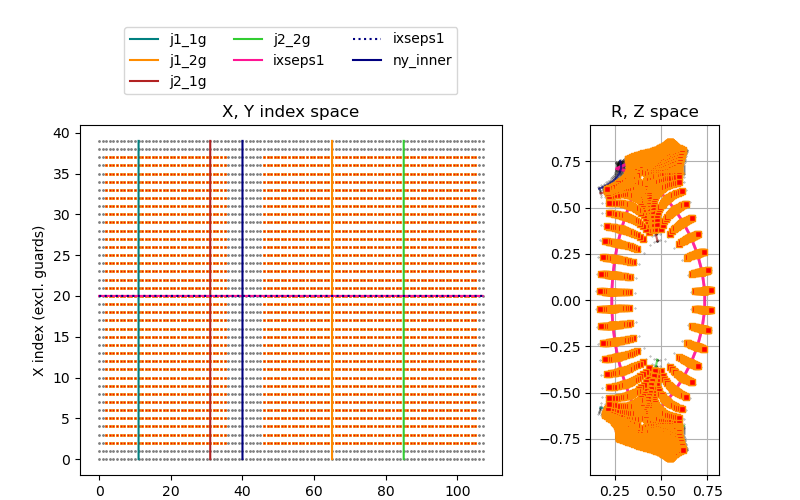

In [246]:
plot_selection(ds, ds.hermesm.select_region("all_noguards"))

In [34]:
last = ds.hermesm.select_region("outer_lower_target")

total_iz = (last["Sd+_iz"] * last["dv"]).sum().values
total_rec = (last["Sd+_rec"] * last["dv"]).sum().values
net_atomic = total_iz + total_rec

print(f'Total ionised: {total_iz:.3e}')
print(f'Total recombined: {total_rec:.3e}')
print(f'Total net atomics: {net_atomic:.3e}')
print
print((last["SNd"]).sum().values)

Total ionised: 4.095e+23
Total recombined: -6.617e+24
Total net atomics: -6.207e+24
33901.47974870846


# Find parameters at single target to verify script

Text(0.5, 1.0, 'outer_lower')

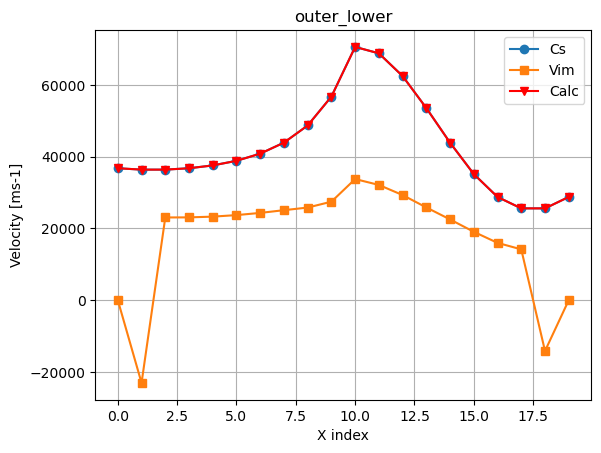

In [84]:
casename = "st40_process"
ds = casestore[casename].ds.copy().isel(t=-1)#.isel(x=slice(2,-2))
m = ds.metadata
target_name = "outer_lower"
ion = "d+"
sheath_ion_polytropic = 1
AA = ds.options[ion]["AA"]
Zi = ds.options[ion]["charge"]
mass_i = constants("mass_p") * AA
q_e = constants("q_e")

self = Target(casestore[casename], "outer_lower")
self.last = ds.hermesm.select_region(f"{target_name}_target")
self.guard = ds.hermesm.select_region(f"{target_name}_target_guard")

def bndry_val(param):
    return (self.last[param].values + self.guard[param].values)/2

try:
    gamma_i = self.ds.options["sheath_boundary_simple"]["gamma_i"]
except:
    gamma_i = 3.5
    
try:
    gamma_e = self.ds.options["sheath_boundary_simple"]["gamma_e"]
except:
    gamma_e = 3.5

# Shapes are (t, x)
Ti = bndry_val(f"T{ion}")
Te = bndry_val(f"Te")
Ne = bndry_val(f"Ne")
Vi = bndry_val(f"V{ion}")
Vim = self.last[f"V{ion}"]
NVi = bndry_val(f"NV{ion}")
J = bndry_val(f"J")
g_22 = bndry_val(f"g_22")
dx = bndry_val("dx")
dz = bndry_val("dz")
da = J/g_22   # Cross-sectional area
factor = (self.last["J"].values + self.guard["J"].values) / (np.sqrt(self.last["g_22"].values) + np.sqrt(self.guard["g_22"].values))

pf_i = Ne * Vi * dx * dz * factor
pf_i = NVi/mass_i * dx * dz * factor
# pf_i = NVi/mass_i * da * dz * dx

Cs = np.sqrt((sheath_ion_polytropic * q_e*Ti + Zi*q_e*Te)/(mass_i)) * 1

calc = np.where(Cs > Vim, Cs, Vim)

fig, ax = plt.subplots()
# ax.plot(range(len(Vi)), Vi, marker = "s", label = "Vi (target)")
ax.plot(range(len(Cs)), Cs, marker = "o", label = "Cs")
ax.plot(range(len(Vim)), Vim, marker = "s", label = "Vim")
ax.plot(range(len(calc)), calc, marker = "v", label = "Calc", c = "r")

# ax.plot(range(len(Cs)), Vi/Cs, marker = "o", label = "Cs")
ax.legend()
ax.grid()
ax.set_xlabel("X index")
ax.set_ylabel("Velocity [ms-1]")
ax.set_title(target_name)

# Find flux at all targets from the guard cells in the code

In [94]:
casename = "st40_process"
df = pd.DataFrame()

ds = casestore[casename].ds.copy().isel(t=-1)
m = ds.metadata

for target_name in m["targets"]:

    self = Target(casestore[casename], target_name)
    self.last = ds.hermesm.select_region(f"{target_name}_target")
    self.guard = ds.hermesm.select_region(f"{target_name}_target_guard")

    def bndry_val(param):
        return (self.last[param].values + self.guard[param].values)/2


    ion = "d+"
    sheath_ion_polytropic = 1
    AA = ds.options[ion]["AA"]
    Zi = ds.options[ion]["charge"]
    mass_i = constants("mass_p") * AA
    q_e = constants("q_e")
    J = bndry_val(f"J")
    g_22 = bndry_val(f"g_22")
    dx = bndry_val("dx")
    dz = bndry_val("dz")
    da = J/g_22   # Cross-sectional area
    factor = (self.last["J"].values + self.guard["J"].values) / (np.sqrt(self.last["g_22"].values) + np.sqrt(self.guard["g_22"].values))



    pf = bndry_val("NVd+") / mass_i
    pf *= dx * dz * factor # Integrate 
    pf = pf.sum()

    df.loc[target_name, "d+"] = abs(pf)

df.loc["total", :] = df.sum(axis=0)
df

,d+
inner_lower,1.867093e+22
outer_lower,6.058436e+22
inner_upper,1.865775e+22
outer_upper,5.991941e+22
total,1.578324e+23


In [160]:
%matplotlib inline

# Particle flow ring by ring

(0.0, 1e+21)

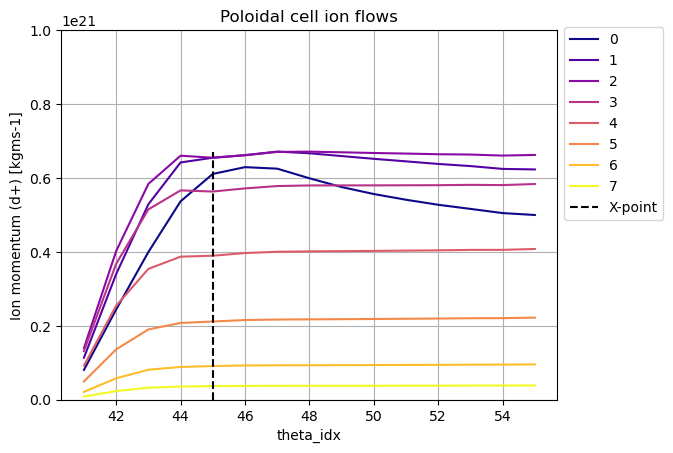

In [238]:
ds = casestore["no_neutrals"].ds
sol = ds.hermesm.select_region("sol_outer_lower_noguards").isel(t=-1)
# sol = ds.hermesm.select_region("all_noguards").isel(t=-1)

# J = bndry_val(f"J")
# g_22 = bndry_val(f"g_22")
# dx = bndry_val("dx")
# dz = bndry_val("dz")
# da = J/g_22   # Cross-sectional area
# factor = (self.last["J"].values + self.guard["J"].values) / (np.sqrt(self.last["g_22"].values) + np.sqrt(self.guard["g_22"].values))
# pf *= dx * dz * factor # Integrate 

pflux = sol["NVd+"]/(constants("mass_p")*2)
pf = pflux * sol["dx"] * sol["dz"] * (sol["J"]/np.sqrt(sol["g_22"]))
pfint = pf.sum("x")
# pfint.plot()
plt.close("all")
fig, ax = plt.subplots(dpi = 100)
num_rings = len(sol.coords["x"])
colors = make_cmap("plasma", num_rings)
for x in range(num_rings):
    pf.isel(x=x).plot(x = "theta_idx", ax=ax, label = x, color = colors[x])
    
# pfint.plot(x = "theta_idx", ax = ax)
ax.vlines(m["j2_2g"], 0, pf.values.max(), colors = "k", ls = "--", label = "X-point")
ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(0.9, 0.9))
ax.set_title("Poloidal cell ion flows")
ax.set_ylim(0,0.1e22)

# Particle flow per region

In [246]:
%matplotlib inline

,leg entrance,final cell centre,target
inner_lower,9.711445e+20,9.502150e+20,9.846621e+20
outer_lower,3.295982e+21,3.311626e+21,3.490521e+21
inner_upper,9.724415e+20,9.520166e+20,9.859905e+20
outer_upper,3.295648e+21,3.311742e+21,3.490530e+21
total,8.535216e+21,8.525600e+21,8.951704e+21


Text(0, 0.5, 'Particle flow [s-1]')

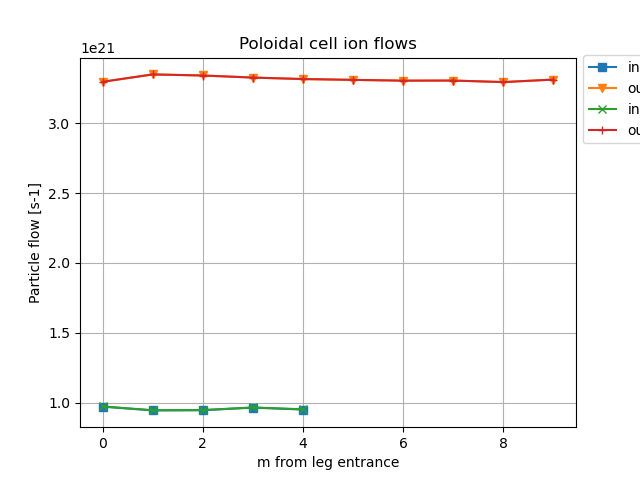

In [270]:
ds = casestore["no_neutrals"].ds.isel(t=-1)


pflux = ds["NVd+"]/(constants("mass_p")*2)
ds["pf_int"] = pflux * ds["dx"] * ds["dz"] * (ds["J"]/np.sqrt(ds["g_22"]))

def bndry_val(param):
        return (last[param].values + guard[param].values)/2


# pfint.plot()
plt.close("all")
fig, ax = plt.subplots(dpi = 100)

regions = dict()
markers = ["s", "v", "x", "+"]
data = dict()
df = pd.DataFrame()
for i, target in enumerate(m["targets"]):
    
    # Calculate leg entry flows
    regions[target] = ds.hermesm.select_region(f"{target}_noguards")
    data[target] = regions[target]["pf_int"].sum("x")
    if "outer_upper" in target or "inner_lower" in target:
        data[target] = data[target][::-1]
        data[target] *= -1
        
    df.loc[target, "leg entrance"] = data[target][0]
    df.loc[target, "final cell centre"] = data[target][-1]
    ax.plot(data[target], label = target, marker = markers[i])
    
    # Calculate target flows
    last = ds.hermesm.select_region(f"{target}_target")
    guard = ds.hermesm.select_region(f"{target}_target_guard")
    
    factor = (last["J"].values + guard["J"].values) / (np.sqrt(last["g_22"].values) + np.sqrt(guard["g_22"].values))
    
    pf = bndry_val("NVd+") / (constants("mass_p") * 2)
    # pf = bndry_val("Nd+") * bndry_val("Vd+")
    pf *= bndry_val("dx") * bndry_val("dz") * factor
    
    df.loc[target, "target"] = abs(pf.sum())

    
df.loc["total", :] = df.sum(axis=0)
display(df)



ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(0.9, 0.9))
ax.set_title("Poloidal cell ion flows")
ax.set_xlabel("m from leg entrance")
ax.set_ylabel("Particle flow [s-1]")
# ax.set_ylim(0,0.2e22)

In [190]:
show_particle_balance_table(ds)

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Domain volume: 1.607e+00 [m3]
Particle imbalance: -2.112e+21 [s-1]
Particle imbalance as frac of core + source: -36.50%
---------------------------------------
Total fluxes in [s-1]:


,d+,d,total
source,0.00e+00,0.00e+00,0.00e+00
core,5.79e+21,0.00e+00,5.79e+21
sol,0.00e+00,0.00e+00,0.00e+00
pfr,0.00e+00,0.00e+00,0.00e+00
targets,-1.58e+23,1.50e+23,-7.90e+21
iz,1.11e+23,-1.11e+23,0.00e+00
rec,-1.32e+19,1.32e+19,0.00e+00


In [ ]:
fig, ax = plt.subplots(dpi=150)
pf.bout.polygon(ax = ax, cmap = "PuOr", logscale = True, antialias = True)

In [258]:
%matplotlib widget

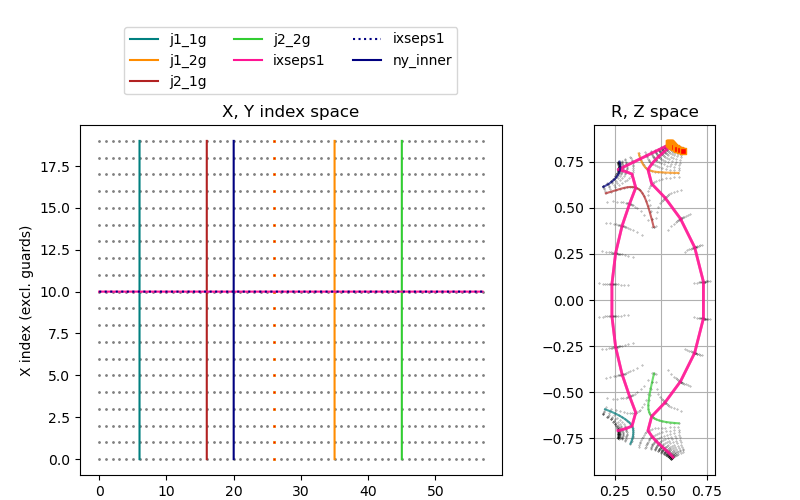

In [266]:
plt.close("all")
sol = ds.hermesm.select_region("sol_noguards")
outer_lower = ds.hermesm.select_region("outer_upper_target")
# plt.plot(pfr.coords["theta"].values)
# xr.combine_by_coords([sol, pfr])
plot_selection(ds, outer_lower)

In [46]:
df = pd.DataFrame()
df["Vim"] = Vim.squeeze()
df["Cs"] = Cs.squeeze()
df["calc"] = np.where(Cs > Vim, Cs, Vim).squeeze()
df

,Vim,Cs,calc
0,0.000000,40718.525387,40718.525387
1,-63850.492558,37374.990516,37374.990516
2,63850.492558,37374.990516,63850.492558
3,69426.183334,40718.525387,69426.183334
4,75215.216736,44907.162647,75215.216736
5,80764.077450,49619.480846,80764.077450
6,87577.406054,55037.705853,87577.406054
7,102378.532664,61396.352951,102378.532664
8,142261.990023,68783.090797,142261.990023
9,221567.089335,76891.017766,221567.089335


In [321]:
ds = casestore["st40_process"].ds.copy().isel(t=-1, x=slice(2,-2))
m = ds.metadata
target_name = "outer_lower"
ion = "d+"
sheath_ion_polytropic = 1
AA = ds.options[ion]["AA"]
Zi = ds.options[ion]["charge"]
mass_i = constants("mass_p") * AA
q_e = constants("q_e")

last = ds.hermesm.select_region(f"{target_name}_target")
guard = ds.hermesm.select_region(f"{target_name}_target_guard")
previous_idx = last.coords["theta_idx"].values -1
previous = ds[{"theta":previous_idx}]

def bndry_val(param):
    return (last[param].values + guard[param].values)/2

try:
    gamma_i = self.ds.options["sheath_boundary_simple"]["gamma_i"]
except:
    gamma_i = 3.5
    
try:
    gamma_e = self.ds.options["sheath_boundary_simple"]["gamma_e"]
except:
    gamma_e = 3.5

# Shapes are (t, x)
Ti = bndry_val(f"T{ion}")
Te = bndry_val(f"Te")
Ne = bndry_val(f"Ne")
Vi = bndry_val(f"V{ion}")
NVi = bndry_val(f"NV{ion}")
J = bndry_val(f"J")
g_22 = bndry_val(f"g_22")
dx = bndry_val("dx")
dz = bndry_val("dz")
# factor = (self.last["J"].values + self.guard["J"].values) / (np.sqrt(self.last["g_22"].values) + np.sqrt(self.guard["g_22"].values))
da = J / np.sqrt(g_22)   # Cross-sectional area

Ne_l = last["Nd+"]
Vi_l = last["Vd+"]
dx_l = last["dx"]
dz_l = last["dz"]
J_l = last["J"]
g_22_l = last["g_22"]
da_l = J_l / np.sqrt(g_22_l)   # Cross-sectional area

pf_previous = (previous["Nd+"] * previous["Vd+"] * previous["dx"] * previous["dz"] * previous["J"]/np.sqrt(previous["g_22"])).sum().values
pf_last = (Ne_l * Vi_l * dx_l * dz_l * (J_l/np.sqrt(g_22_l))).sum().values
pf_target = abs((Ne * Vi * dx * dz * da).sum())
pf_guard = (guard["Nd+"] * guard["Vd+"] * guard["dx"] * guard["dz"] * guard["J"]/np.sqrt(guard["g_22"])).sum().values

df = pd.DataFrame()
df.loc["pf", "previous"] = pf_previous
df.loc["Ne", "previous"] = previous["Nd+"].sum().values
df.loc["Vi", "previous"] = previous["Vd+"].sum().values
df.loc["dx*dz*J/sqrt(g_22)", "previous"] = (previous["dx"] * previous["dz"] * previous["J"]/np.sqrt(previous["g_22"])).sum().values

df.loc["pf", "last"] = pf_last
df.loc["Ne", "last"] = Ne_l.sum().values
df.loc["Vi", "last"] = Vi_l.sum().values
df.loc["dx*dz*J/sqrt(g_22)", "last"] = (dx_l*dz_l*da_l).values.sum()


df.loc["pf", "target"] = pf_target
df.loc["Ne", "target"] = Ne.sum()
df.loc["Vi", "target"] = Vi.sum()
df.loc["dx*dz*J/sqrt(g_22)", "target"] = (dx*dz*da).sum()
df.loc["dx", "target"] = dx.sum()
df.loc["dz", "target"] = dz.sum()
df.loc["J", "target"] = J.sum()
df.loc["g_22", "target"] = g_22.sum()

df.loc["pf", "guard"] = pf_guard
df.loc["Ne", "guard"] = guard["Nd+"].sum().values
df.loc["Vi", "guard"] = guard["Vd+"].sum().values
df.loc["dx*dz*J/sqrt(g_22)", "guard"] = (guard["dx"] * guard["dz"] * guard["J"]/np.sqrt(guard["g_22"])).sum().values

o = {"previous" : previous, "last" : last, "guard" : guard}
for name in o:
    df.loc["dx", name] = o[name]["dx"].sum().values
    df.loc["dz", name] = o[name]["dz"].sum().values
    df.loc["J", name] = o[name]["J"].sum().values
    df.loc["g_22", name] = o[name]["g_22"].sum().values
    

display(df)
print(pf_last)
print(pf_target)
# pf_i = NVi/mass_i * da * dz * dx

# Cs = -np.sqrt((sheath_ion_polytropic * q_e*Ti + Zi*q_e*Te)/(mass_i))

# fig, ax = plt.subplots()
# ax.plot(range(len(Vi)), Vi, marker = "o", label = "Vi")
# ax.plot(range(len(Cs)), Cs, marker = "o", label = "Cs")
# # ax.plot(range(len(Cs)), Vi/Cs, marker = "o", label = "Cs")
# ax.legend()
# ax.grid()
# ax.set_xlabel("X index")
# ax.set_ylabel("Velocity [ms-1]")
# ax.set_title(target_name)

,previous,last,target,guard
pf,2.154649e+22,2.503598e+22,4.207934e+22,5.418397e+22
Ne,3.516473e+20,2.621558e+20,2.298627e+20,1.975697e+20
Vi,2.387127e+05,3.883555e+05,7.281702e+05,1.067985e+06
dx*dz*J/sqrt(g_22),6.242410e-02,6.274476e-02,6.234467e-02,6.294887e-02
dx,2.197387e-02,2.197387e-02,2.197387e-02,2.197387e-02
dz,1.005310e+02,1.005310e+02,1.005310e+02,1.005310e+02
J,9.639085e-01,7.317349e-01,6.501001e-01,5.684653e-01
g_22,2.952736e-01,1.681034e-01,1.344075e-01,1.007117e-01


2.5035984285342624e+22
4.207934233375224e+22


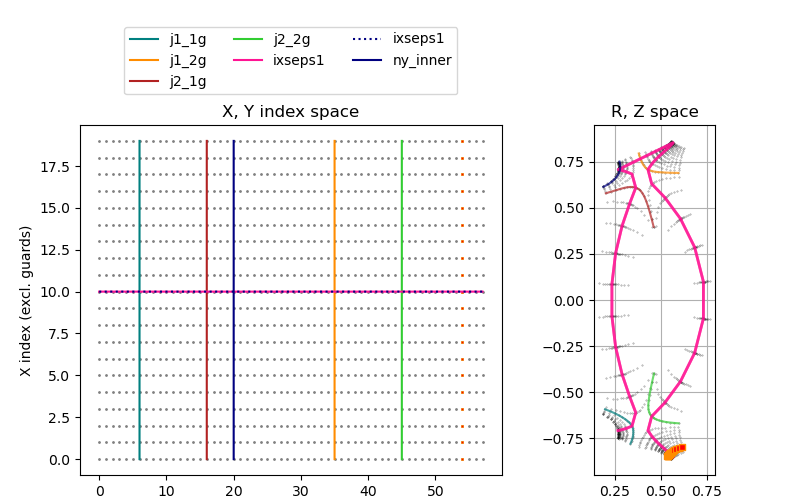

In [306]:
previous_idx = last.coords["theta_idx"].values -1
previous = ds[{"theta":previous_idx}]
plot_selection(ds, previous)

### Neutrals

In [248]:
ds.data_vars

Data variables:
    Bxy                     (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    Dnnd                    (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Ed+_iz                  (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Ed+_rec                 (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Edd+_cx                 (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Fd+_iz                  (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Fd+_rec                 (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    Fdd+_cx                 (t, x, theta) float64 dask.array<chunksize=(709, 20, 7), meta=np.ndarray>
    G1                      (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    G2                      (x, theta) float64 dask.array<chunksize=(20, 7), meta=

In [251]:
NVn = bndry_val("NVd")

flux_n = NVn / mass_i

flux_n

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [242]:
ds = casestore["puffg"].ds.copy()

ds = calculate_target_fluxes(ds)

m = ds.metadata
ds = ds.isel(t=-1)
for name in m["targets"]:
    df.loc[name, "pf_d+"] = ds[f"pf_{name}_d+"].sum()
    df.loc[name, "hf_d+"] = ds[f"hf_{name}_d+"].sum()
    df.loc[name, "hf_e"] = ds[f"hf_{name}_e"].sum()
    
df

0.01008570512959844
0.005831724108055718
0.04526543013998092
0.03448238121322897
0.07974781135320988


,pf_d+,hf_d+,hf_e
inner_lower,-2.863949e+21,-101695.115195,-55495.702342
outer_lower,-1.383279e+22,-357094.956037,-199977.578493
inner_upper,-2.876351e+21,-102131.472429,-55697.617172
outer_upper,-1.383526e+22,-356479.427966,-199813.570666


In [218]:
%matplotlib widget

In [76]:
yt = (self.last["theta"].values + self.guard["theta"].values) * 0.5
yt

C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:8: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDataArrayAccessor'> under name 'hermesm' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class HermesDataArrayAccessor(BoutDataArrayAccessor):
C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:38: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDatasetAccessor'> under name 'hermesm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class HermesDatasetAccessor(BoutDatasetAccessor):


array([16.65044106])

In [77]:
x = ((self.last + self.guard) * 0.5)

x["NVd+"].values
# fig, ax = plt.subplots(dpi = 150)
# ax.plot(x.coords["t"], x["NVd+"])

array([], shape=(709, 40, 0), dtype=float64)